# Substance Use and Academic Performance

## Overview

[Overview Paragraph]

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import poisson
import random

## Alcohol

The research conducted by the authors of *Assessing Drinking and Academic Performance Among a Nationally Representative Sample of College Students* have a sample of 23,518 undergraduate students complete a questionarrie over their alchol use in social settings to see if there is a significant correlation between academic performance and alchol use (Piazza-Gardner et al., 2016). To replicate this study and compare how often students with different academic performances drink, we used the average amount of drinks each GPA typically has (*4.0 - 2.22*, *3.0 - 3.37*, *2.0 - 3.60*, *1.0 - 3.91*). With these means, we used the famous Poisson distribution to calculate the probability of each GPA having 0 to 10+ drinks and stored these probabilites to use as weights.

To simulate the experiment, we iterated over the range of our sample size and used `random choices` function to randomly picked a student's GPA and then the number of drinks they'll have at a party based on the weighted probability of that GPA. The GPA is also picked using weighted probabilities (*4.0 - 0.27*, *3.0 - 0.38*, *2.0 - 0.21*, *1.0 - 0.14*) as it is far less likely for the average college student to have a 1.0 than it is to have around a 3.0.

In [18]:
# Study Measures
alc_quantity = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
gpa_vals = ['4', '3', '2', '1']

a_probabilities = []
b_probabilities = []
c_probabilities = []
f_probabilities = []

# Estimated probabilities for number of drinks using Poisson distribution and given means
for x in range(len(alc_quantity)-1):
    prob = poisson.pmf(x, mu=2.22)
    a_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.37)
    b_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.60)
    c_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.91)
    f_probabilities.append(prob)

# Probability for 10 or moredrinks
a_probabilities.append(1 - poisson.cdf(9, mu=2.8))
b_probabilities.append(1 - poisson.cdf(9, mu=3.6))
c_probabilities.append(1 - poisson.cdf(9, mu=3.876))
f_probabilities.append(1 - poisson.cdf(9, mu=3.748))

# Simulated Sample Data
n = 23518
data = {'GPA': [], 'Number of Drinks': []}
for student in range(n):
    gpa = random.choices(gpa_vals, weights=[0.27, 0.38, 0.21, 0.14])[0]
    if gpa == '4':
        drinks = random.choices(alc_quantity, weights=a_probabilities)[0]
    elif gpa == '3':
        drinks = random.choices(alc_quantity, weights=b_probabilities)[0]
    elif gpa == '2':
        drinks = random.choices(alc_quantity, weights=c_probabilities)[0]
    else:
        drinks = random.choices(alc_quantity, weights=f_probabilities)[0]
    data['GPA'].append(gpa)
    data['Number of Drinks'].append(drinks)

#### *Distribution of the Number of Drinks Consumed by GPA:*

Text(0.5, 1.0, 'Distribution of the Number of Drinks Consumed by GPA')

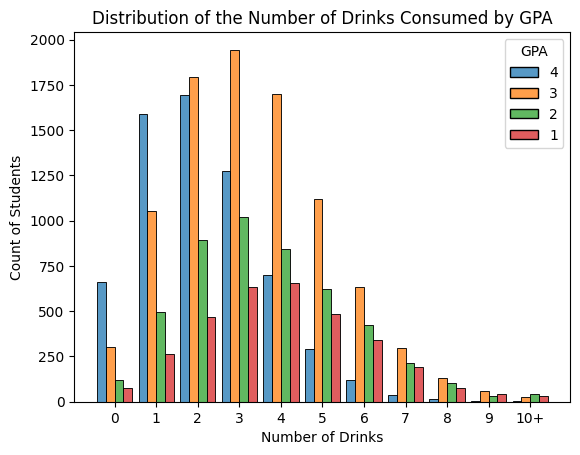

In [19]:
# convert data dict to DataFrame and ensure categorical ordering for the x-axis
df = pd.DataFrame(data)
df['Number of Drinks'] = pd.Categorical(df['Number of Drinks'], categories=alc_quantity, ordered=True)

sns.histplot(data=df, x='Number of Drinks', hue='GPA', multiple='dodge', shrink=0.85, hue_order=gpa_vals)
plt.ylabel('Count of Students')
plt.title("Distribution of the Number of Drinks Consumed by GPA")

The distribution above shows that as a collective whole, undergraduate students have around 2-4 drinks at social events. The histogram has a right-skewed distribution which highlights that very few students report that they consume an extereme amount of alcohol at parties. 

The likelihood for each number of drinks changes slighty based on the student's GPA as expected. For example, students with 4.0's are the most likely to have one or less drinks and the least likely to have 10+ drinks. To clearly compare the differences between academic performances, a small multiple plot is created in the next code block.

##### *Small Multiple Plot:*

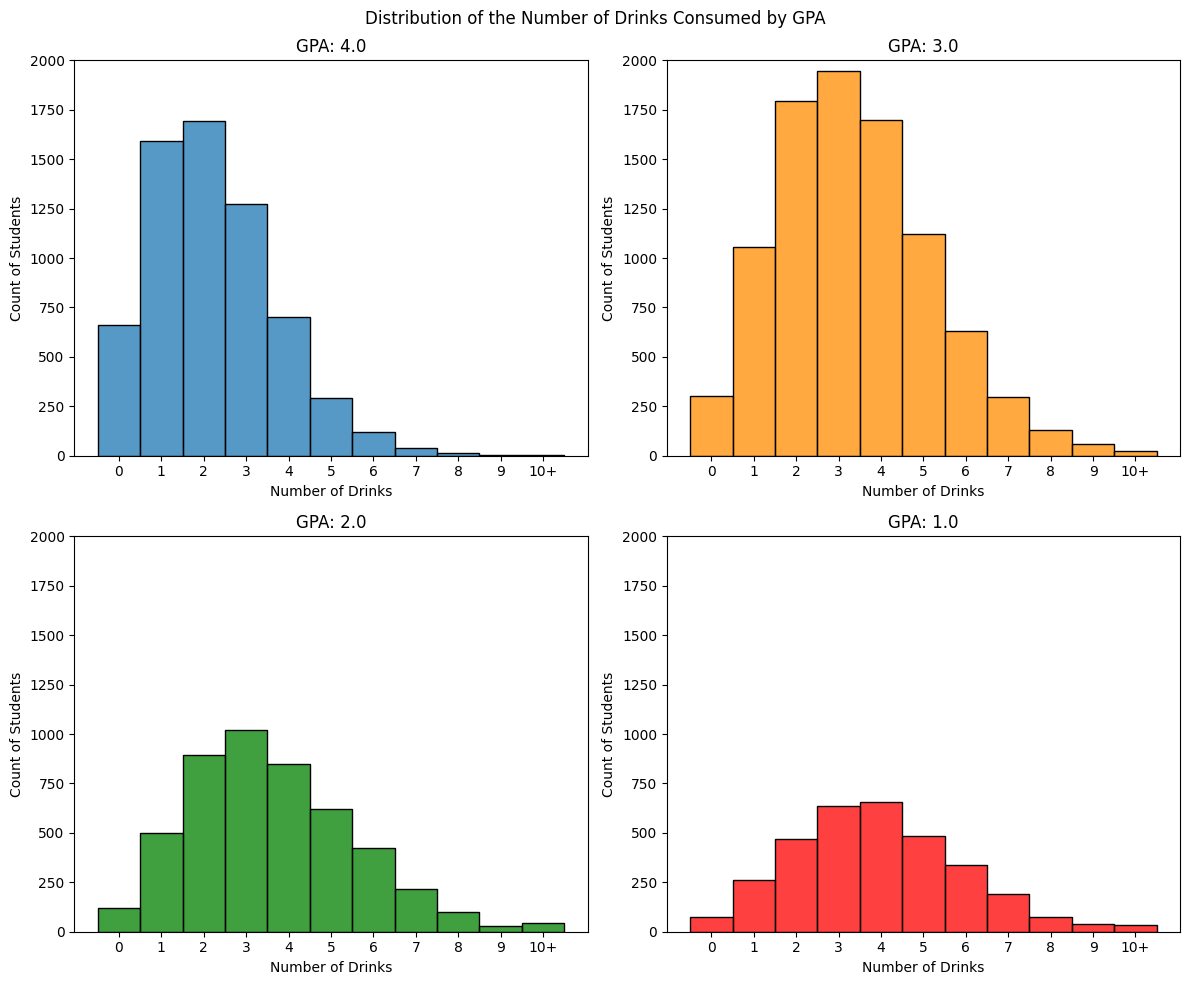

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=df[df['GPA'] == '4'], x='Number of Drinks',ax=axs[0,0])
axs[0,0].set_title('GPA: 4.0')
axs[0,0].set_ylabel('Count of Students')
axs[0,0].set_ylim(0, 2000)

sns.histplot(data=df[df['GPA'] == '3'], x='Number of Drinks',ax=axs[0,1], color = 'darkorange')
axs[0,1].set_title('GPA: 3.0')
axs[0,1].set_ylabel('Count of Students')
axs[0,1].set_ylim(0, 2000)

sns.histplot(data=df[df['GPA'] == '2'], x='Number of Drinks', ax=axs[1,0], color = 'green')
axs[1,0].set_title('GPA: 2.0')
axs[1,0].set_ylabel('Count of Students')
axs[1,0].set_ylim(0, 2000)

sns.histplot(data=df[df['GPA'] == '1'], x='Number of Drinks', ax=axs[1,1], color = 'red')
axs[1,1].set_title('GPA: 1.0')
axs[1,1].set_ylabel('Count of Students')
axs[1,1].set_ylim(0, 2000)

plt.suptitle("Distribution of the Number of Drinks Consumed by GPA")
plt.tight_layout()

***GPA of 4.0:***
Students with about a 4.0 on average have about 2 drinks at social settings, alligning with the research conducted by Piazza-Gardner et al.. Unlike the other GPA's, the amount of students who drink each amount begins to decrease after 2 drinks. Additionally, there are virtually no students with a 4.0 GPA are drinking 8 or more drinks. Most students that choose not to drink at parties or limit themselves to 1 also have a 4.0. This is the most skewed to the right which highlights that they seem to drink the least at social settings.

***GPA of 3.0:***
Students with a 3.0 have about 2-4 drinks on average at social settings, with 3 being the most likely number for this group. As this GPA is most common for students, this group has the highiest proportion seen. The difference between the number of 3.0 and 4.0 students having one drink is pretty notable, as there are more 3.0 students but still have far less students drinking one drink than 4.0 students. This shows that they are more likely to consume a greater amount of alchol, aligning with the theory that are alcohol consumption increases, academic performance tends to decrease.

***GPA of 2.0:***
Similar to the previous group, Students with a 3.0 have about 2-4 drinks on average at social settings, with 3 being the most likely number for this group. Because it is almost as likely for a random student to have a 4.0 as it is to have a 2.0 (.27 vs .21 likelihood), the differences between these two plots is pretty notable. While it is still a right-skewed distribution, the skew is less strong for 2.0 students as a decent amount of students are drinking 6 or more drinks. This is simply not the case for students with 4.0's as the number of drinks drastically decreases after 4. Additionally, very few students with 2.0's aren't drinking at all, further highlighting the disparity.

***GPA of 1.0:***

### Simulate the Experiment 100 Times

In [21]:
trial_data = []
for i in range(101):
    n = 23518
    data = {'GPA': [], 'Number of Drinks': []}
    for student in range(n):
        gpa = random.choices(gpa_vals, weights=[0.27, 0.38, 0.21, 0.14])[0]
        if gpa == '4':
            drinks = random.choices(alc_quantity, weights=a_probabilities)[0]
        elif gpa == '3':
            drinks = random.choices(alc_quantity, weights=b_probabilities)[0]
        elif gpa == '2':
            drinks = random.choices(alc_quantity, weights=c_probabilities)[0]
        else:
            drinks = random.choices(alc_quantity, weights=f_probabilities)[0]
        data['GPA'].append(gpa)
        data['Number of Drinks'].append(drinks)

    trial_data.append(data)

Text(0.5, 1.0, 'Distribution of the Number of Drinks Consumed by GPA')

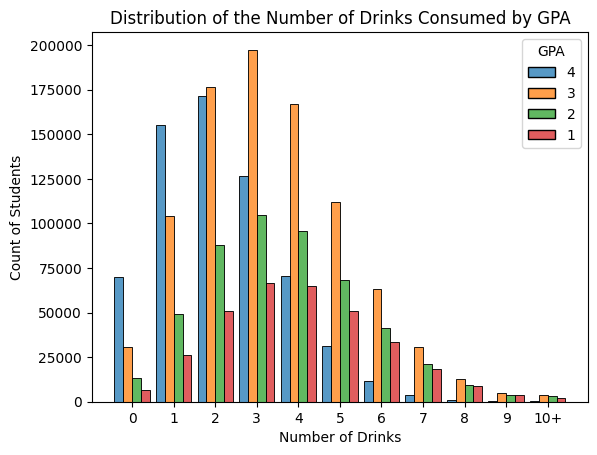

In [22]:
simulated_data = pd.concat([pd.DataFrame(d) for d in trial_data])
simulated_data['Number of Drinks'] = pd.Categorical(simulated_data['Number of Drinks'], categories=alc_quantity, ordered=True)

sns.histplot(data=simulated_data, x='Number of Drinks', hue='GPA', multiple='dodge', shrink=0.85, hue_order=gpa_vals)
plt.ylabel('Count of Students')
plt.title("Distribution of the Number of Drinks Consumed by GPA")

## Marijuana

## Vaping

In [23]:
def simulate_vaping_gpa(N=10000):
    categories = [
        "Never", "Not last 30 days", "1-2 days", "3-5 days",
        "6-9 days", "10-19 days", "20-29 days", "Daily"
    ]
    probs = np.array([0.814, 0.102, 0.025, 0.010, 0.007, 0.007, 0.018, 0.018])
    probs = probs / probs.sum()
    
    
    P_yes = {"A": 0.376, "B": 0.485, "C": 0.128, "D/F": 0.011}
    P_no  = {"A": 0.475, "B": 0.434, "C": 0.086, "D/F": 0.005}
    gpa_map = {"A":4, "B":3, "C":2, "D/F":1}
    
    yes_set = {"1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days", "Daily"}
    
    # Simulate usage
    usage = np.random.choice(categories, size=N, p=probs)
    gpa_numeric = []
    
    for u in usage:
        if u in yes_set:
            g = np.random.choice(list(P_yes.keys()), p=list(P_yes.values()))
        else:
            g = np.random.choice(list(P_no.keys()), p=list(P_no.values()))
        gpa_numeric.append(gpa_map[g])
    
    df = pd.DataFrame({"usage": usage, "GPA_numeric": gpa_numeric})
    
    # Ordered categories
    df["usage"] = pd.Categorical(df["usage"], categories=categories, ordered=True)
    gpa_order = [4, 3, 2, 1]
    df["GPA_numeric"] = pd.Categorical(df["GPA_numeric"], categories=gpa_order, ordered=True)
    
    # Compute percentages
    percent_df = (
        df.groupby(["usage", "GPA_numeric"])
          .size()
          .reset_index(name="count")
    )
    percent_df["percent"] = percent_df.groupby("usage")["count"].transform(lambda x: 100 * x / x.sum())
    
    return percent_df

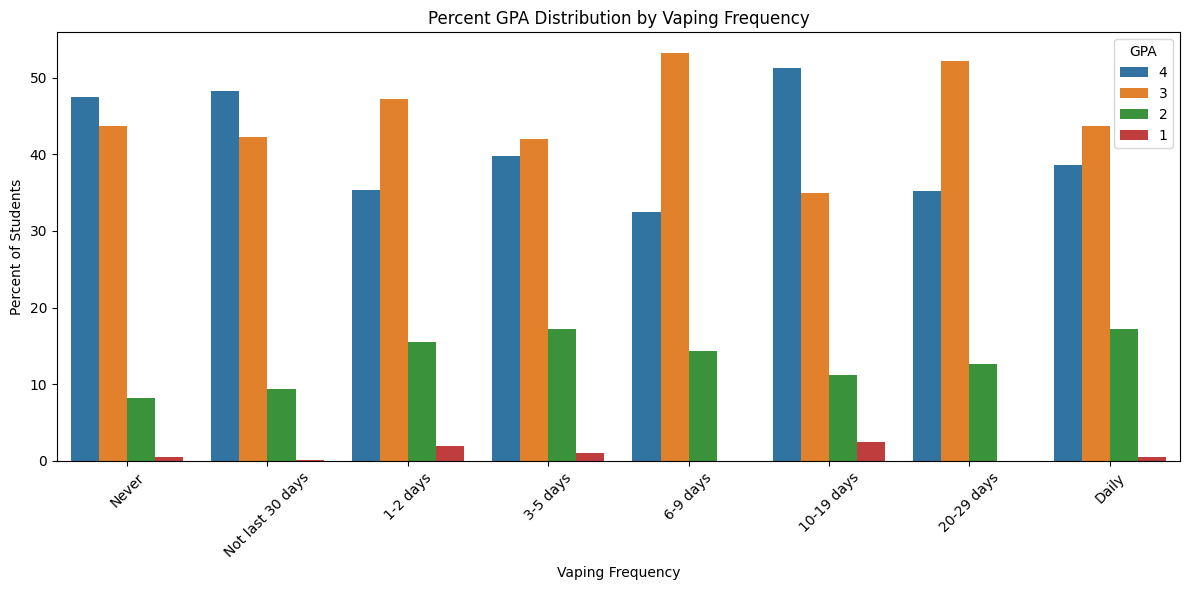

In [24]:
df_sim = simulate_vaping_gpa()

gpa_order = [4, 3, 2, 1]
plt.figure(figsize=(12,6))
sns.barplot(data=df_sim, x="usage", y="percent", hue="GPA_numeric", hue_order = gpa_order)

plt.xlabel("Vaping Frequency")
plt.ylabel("Percent of Students")
plt.title("Percent GPA Distribution by Vaping Frequency")
plt.xticks(rotation=45)
plt.legend(title="GPA")
plt.tight_layout()
plt.show()

## Simulate the Experiment 100 Times

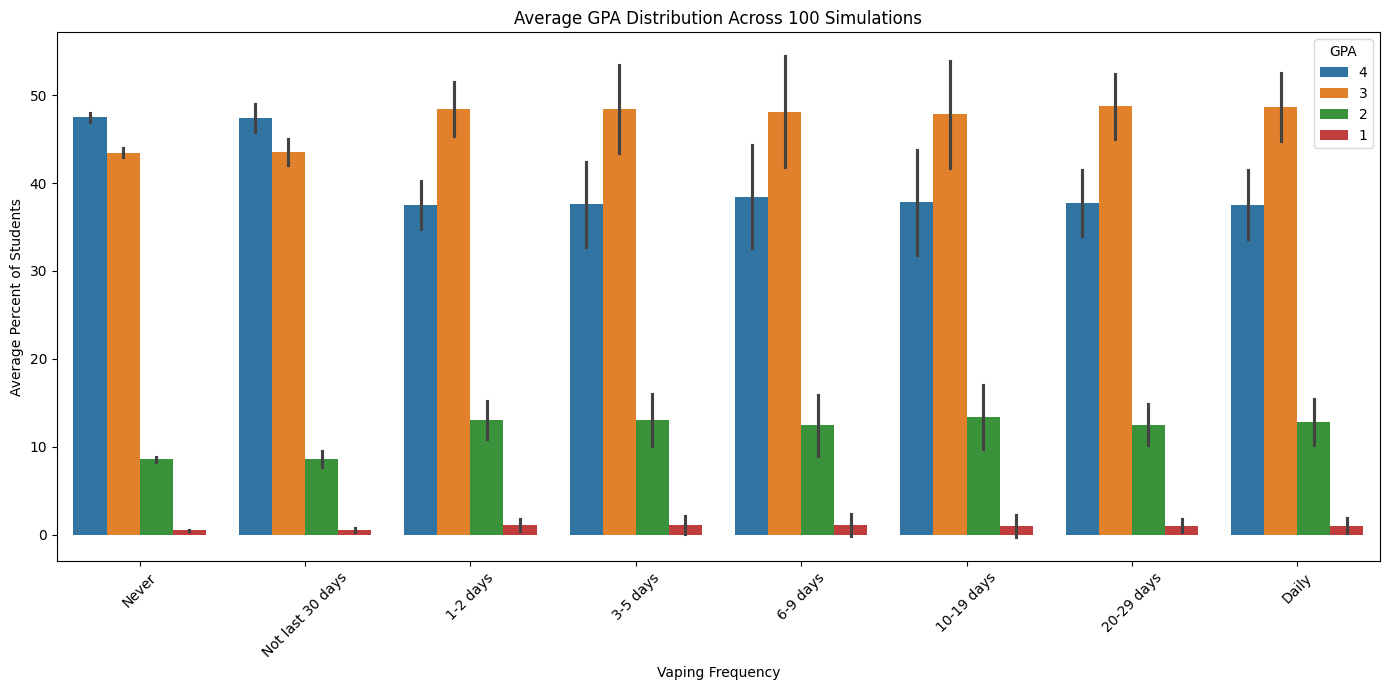

In [25]:
import warnings
warnings.filterwarnings("ignore")

simulations = 100
all_sim_results = []

for sim in range(simulations):
    df_sim = simulate_vaping_gpa()
    df_sim["sim"] = sim + 1
    all_sim_results.append(df_sim)

# Combine all simulations
all_sim_df = pd.concat(all_sim_results)

plt.figure(figsize=(14,7))
sns.barplot(
    data=all_sim_df,
    x="usage",
    y="percent",
    hue="GPA_numeric",
    hue_order=[4,3,2,1],
    palette="tab10",
    ci="sd"   # compute standard deviation automatically
)

plt.xlabel("Vaping Frequency")
plt.ylabel("Average Percent of Students")
plt.title("Average GPA Distribution Across 100 Simulations")
plt.xticks(rotation=45)
plt.legend(title="GPA")
plt.tight_layout()
plt.show()